### Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns   
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
def read_data() -> pd.DataFrame : 
    trc=pd.read_excel(r'C:\Users\Family\Desktop\WIDS-Com\Train\TRAIN_CATEGORICAL_new.xlsx')
    trq=pd.read_excel(r'C:\Users\Family\Desktop\WIDS-Com\Train\TRAIN_QUANTITATIVE_new.xlsx')
    trf=pd.read_csv(r'C:\Users\Family\Desktop\WIDS-Com\Train\TRAIN_FUNCTIONAL_new.csv')
    trs=pd.read_excel(r'C:\Users\Family\Desktop\WIDS-Com\Train\up_SOLUTIONS (3).xlsx')  
    trs=pd.read_excel(r'C:\Users\Family\Desktop\WIDS-Com\Train\TRAINING_SOLUTIONS.xlsx')  
    tsc=pd.read_excel(r'C:\Users\Family\Desktop\WIDS-Com\Test\TEST_CATEGORICAL.xlsx')
    tsq=pd.read_excel(r'C:\Users\Family\Desktop\WIDS-Com\Train\TEST_QUANTITATIVE_METADATA.xlsx')    
    tsf=pd.read_csv(r'C:\Users\Family\Desktop\WIDS-Com\Test\TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv')    
    sub=pd.read_excel(r'C:\Users\Family\Desktop\WIDS-Com\Submission\SAMPLE_SUBMISSION.xlsx')    
    dic=pd.read_excel(r'C:\Users\Family\Desktop\WIDS-Com\Submission\Data Dictionary.xlsx')
    return trc, trq, trf, trs, tsc, tsq, tsf, sub, dic

trc, trq, trf, trs, tsc, tsq, tsf, sub, dic = read_data()

In [3]:
trs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   participant_id  1213 non-null   object
 1   ADHD_Outcome    1213 non-null   int64 
 2   Sex_F           1213 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 28.6+ KB


In [4]:
sex_f_percentage = trs['Sex_F'].value_counts(normalize=True) * 100
print(sex_f_percentage)

Sex_F
0    65.704864
1    34.295136
Name: proportion, dtype: float64


In [ ]:
trs[Sex]

### COULOMNS

EHQ_EHQ_Total - Measures hand preference (right/left-handedness).

ColorVision_CV_Score - Score from a color vision test.

APQ_P_APQ_P_CP - Measures use of physical punishment by parents.

APQ_P_APQ_P_ID - Measures inconsistency in parental discipline.

APQ_P_APQ_P_INV - Measures parental involvement in the child’s life.

APQ_P_APQ_P_OPD - Measures other discipline methods used by parents.

APQ_P_APQ_P_PM - Measures how well parents monitor their child.

APQ_P_APQ_P_PP - Measures positive parenting (praise/rewards).

SDQ_SDQ_Conduct_Problems - Measures behavior issues like aggression.

SDQ_SDQ_Difficulties_Total - Total score of emotional, conduct, hyperactivity, and peer problems.

SDQ_SDQ_Emotional_Problems - Measures emotional struggles (e.g., anxiety, sadness).

SDQ_SDQ_Externalizing - Combines conduct problems and hyperactivity.

SDQ_SDQ_Generating_Impact - Measures how much difficulties affect daily life.

SDQ_SDQ_Hyperactivity - Measures hyperactivity/attention problems (e.g., ADHD symptoms).

SDQ_SDQ_Internalizing - Combines emotional and peer problems.

SDQ_SDQ_Peer_Problems - Measures struggles with friendships.

SDQ_SDQ_Prosocial - Measures kindness/helpfulness toward others.

MRI_Track,Age_at_Scan - Age during MRI scan.

Basic_Demos_Enroll_Year - Year participant joined the study.

Basic_Demos_Study_Site - Location where testing occurred.

PreInt_Demos_Fam_Child_Ethnicity - Child’s ethnicity.

PreInt_Demos_Fam_Child_Race - Child’s race.

MRI_Track_Scan_Location - Location of MRI scan.

Barratt_Barratt_P1_Edu - Parent 1’s education level.

Barratt_Barratt_P1_Occ - Parent 1’s occupation.

Barratt_Barratt_P2_Edu - Parent 2’s education level.

Barratt_Barratt_P2_Occ - Parent 2’s occupation.



In [ ]:
trc.head()  

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,00aIpNTbG5uh,2019,4,1.0,0.0,3.0,21.0,45.0,NaN,NaN
1,00fV0OyyoLfw,2017,1,0.0,9.0,2.0,21.0,0.0,21.0,45.0
2,04X1eiS79T4B,2017,1,1.0,2.0,2.0,9.0,0.0,NaN,NaN
3,05ocQutkURd6,2018,1,3.0,8.0,2.0,18.0,10.0,18.0,0.0
4,06YUNBA9ZRLq,2018,1,0.0,1.0,2.0,12.0,0.0,NaN,NaN


In [ ]:
trc.describe()

,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
count,1213.000000,1213.000000,1170.000000,1159.000000,1210.000000,1198.000000,1182.000000,1015.000000,991.000000
mean,2017.652102,2.014839,0.435897,2.177739,2.294215,17.862270,25.545685,16.876847,30.257316
std,1.122522,1.135147,0.693174,3.204782,0.750660,3.505608,16.757043,3.929558,13.901144
min,2015.000000,1.000000,0.000000,0.000000,1.000000,3.000000,0.000000,3.000000,0.000000
25%,2017.000000,1.000000,0.000000,0.000000,2.000000,15.000000,5.000000,15.000000,20.000000
50%,2018.000000,1.000000,0.000000,1.000000,2.000000,18.000000,30.000000,18.000000,35.000000
75%,2019.000000,3.000000,1.000000,2.000000,3.000000,21.000000,40.000000,21.000000,40.000000
max,2020.000000,4.000000,3.000000,11.000000,4.000000,21.000000,45.000000,21.000000,45.000000


In [ ]:
trf.head()

,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,70z8Q2xdTXM3,0.222930,0.527903,0.429966,0.060457,0.566489,0.315342,0.508408,-0.078290,0.525692,...,0.224985,0.397448,0.422966,0.184642,0.305549,0.420349,0.016328,0.561864,0.471170,0.365221
1,WHWymJu6zNZi,0.614765,0.577255,0.496127,0.496606,0.404686,0.439724,0.122590,-0.085452,0.120673,...,0.217546,-0.014549,0.000440,-0.096451,0.454501,0.343916,0.167313,0.607656,0.550623,0.503176
2,4PAQp1M6EyAo,-0.116833,0.458408,0.260703,0.639031,0.769337,0.442528,0.637110,0.192010,0.520379,...,0.342487,-0.021141,-0.037836,0.075069,0.412712,0.292708,0.391005,0.461544,0.508912,0.624232
3,obEacy4Of68I,0.199688,0.752714,0.658283,0.575096,0.692867,0.645789,0.522750,0.412188,0.530843,...,0.103562,-0.178313,0.210983,-0.018666,0.436313,0.592982,0.216205,0.341272,0.440313,0.558193
4,s7WzzDcmDOhF,0.227321,0.613268,0.621447,0.562673,0.736709,0.589813,0.266676,0.359668,0.300771,...,-0.164956,0.007064,-0.120904,-0.488095,0.493575,-0.215361,0.210685,0.055850,0.119065,0.108273


In [ ]:
trq.head()

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,00aIpNTbG5uh,100.00,13.0,3.0,15.0,44.0,14.0,20.0,27.0,3.0,17.0,4.0,11.0,5.0,8.0,6.0,2.0,9.0,14.274127
1,00fV0OyyoLfw,92.27,14.0,3.0,12.0,35.0,25.0,28.0,30.0,5.0,20.0,4.0,13.0,5.0,8.0,7.0,3.0,8.0,NaN
2,04X1eiS79T4B,86.67,14.0,3.0,21.0,37.0,18.0,26.0,28.0,3.0,24.0,7.0,10.0,10.0,7.0,14.0,7.0,7.0,13.463381
3,05ocQutkURd6,93.34,14.0,3.0,11.0,42.0,15.0,20.0,28.0,0.0,5.0,0.0,3.0,0.0,3.0,2.0,2.0,6.0,9.572553
4,06YUNBA9ZRLq,0.00,14.0,8.0,12.0,35.0,22.0,12.0,24.0,6.0,23.0,7.0,15.0,8.0,9.0,8.0,1.0,4.0,6.654574


In [ ]:
trc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    1213 non-null   object 
 1   Basic_Demos_Enroll_Year           1213 non-null   int64  
 2   Basic_Demos_Study_Site            1213 non-null   int64  
 3   PreInt_Demos_Fam_Child_Ethnicity  1170 non-null   float64
 4   PreInt_Demos_Fam_Child_Race       1159 non-null   float64
 5   MRI_Track_Scan_Location           1210 non-null   float64
 6   Barratt_Barratt_P1_Edu            1198 non-null   float64
 7   Barratt_Barratt_P1_Occ            1182 non-null   float64
 8   Barratt_Barratt_P2_Edu            1015 non-null   float64
 9   Barratt_Barratt_P2_Occ            991 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 94.9+ KB


In [8]:
trf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Columns: 19901 entries, participant_id to 198throw_199thcolumn
dtypes: float64(19900), object(1)
memory usage: 184.2+ MB


In [9]:
trq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   participant_id              1213 non-null   object 
 1   EHQ_EHQ_Total               1200 non-null   float64
 2   ColorVision_CV_Score        1190 non-null   float64
 3   APQ_P_APQ_P_CP              1201 non-null   float64
 4   APQ_P_APQ_P_ID              1201 non-null   float64
 5   APQ_P_APQ_P_INV             1201 non-null   float64
 6   APQ_P_APQ_P_OPD             1201 non-null   float64
 7   APQ_P_APQ_P_PM              1201 non-null   float64
 8   APQ_P_APQ_P_PP              1201 non-null   float64
 9   SDQ_SDQ_Conduct_Problems    1204 non-null   float64
 10  SDQ_SDQ_Difficulties_Total  1204 non-null   float64
 11  SDQ_SDQ_Emotional_Problems  1204 non-null   float64
 12  SDQ_SDQ_Externalizing       1204 non-null   float64
 13  SDQ_SDQ_Generating_Impact   1204 

In [10]:
tsc.describe()  

,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
count,304.000000,304.000000,301.000000,298.000000,304.000000,303.000000,303.000000,268.000000,262.000000
mean,2022.197368,4.009868,0.355482,2.231544,3.638158,19.128713,29.389439,18.458955,35.763359
std,0.494718,0.099012,0.665741,3.392914,0.481326,2.680553,16.484193,3.087093,11.978162
min,2019.000000,4.000000,0.000000,0.000000,3.000000,3.000000,0.000000,3.000000,0.000000
25%,2022.000000,4.000000,0.000000,0.000000,3.000000,18.000000,25.000000,18.000000,30.000000
50%,2022.000000,4.000000,0.000000,0.000000,4.000000,21.000000,35.000000,18.000000,40.000000
75%,2022.000000,4.000000,1.000000,3.000000,4.000000,21.000000,45.000000,21.000000,45.000000
max,2023.000000,5.000000,3.000000,11.000000,4.000000,21.000000,45.000000,21.000000,45.000000


In [11]:
tsc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    304 non-null    object 
 1   Basic_Demos_Enroll_Year           304 non-null    int64  
 2   Basic_Demos_Study_Site            304 non-null    int64  
 3   PreInt_Demos_Fam_Child_Ethnicity  301 non-null    float64
 4   PreInt_Demos_Fam_Child_Race       298 non-null    float64
 5   MRI_Track_Scan_Location           304 non-null    int64  
 6   Barratt_Barratt_P1_Edu            303 non-null    float64
 7   Barratt_Barratt_P1_Occ            303 non-null    float64
 8   Barratt_Barratt_P2_Edu            268 non-null    float64
 9   Barratt_Barratt_P2_Occ            262 non-null    float64
dtypes: float64(6), int64(3), object(1)
memory usage: 23.9+ KB


#### lets merge our data ><

In [13]:
cq = pd.merge(trc, trq, on='participant_id', how='left')
feat = pd.merge(cq, trf, on='participant_id', how='left')  
qc = pd.merge(tsc, tsq, on='participant_id', how='left')
train = pd.merge(feat, trs, on='participant_id', how='left') 
test = pd.merge(qc, tsf, on='participant_id', how='left')  


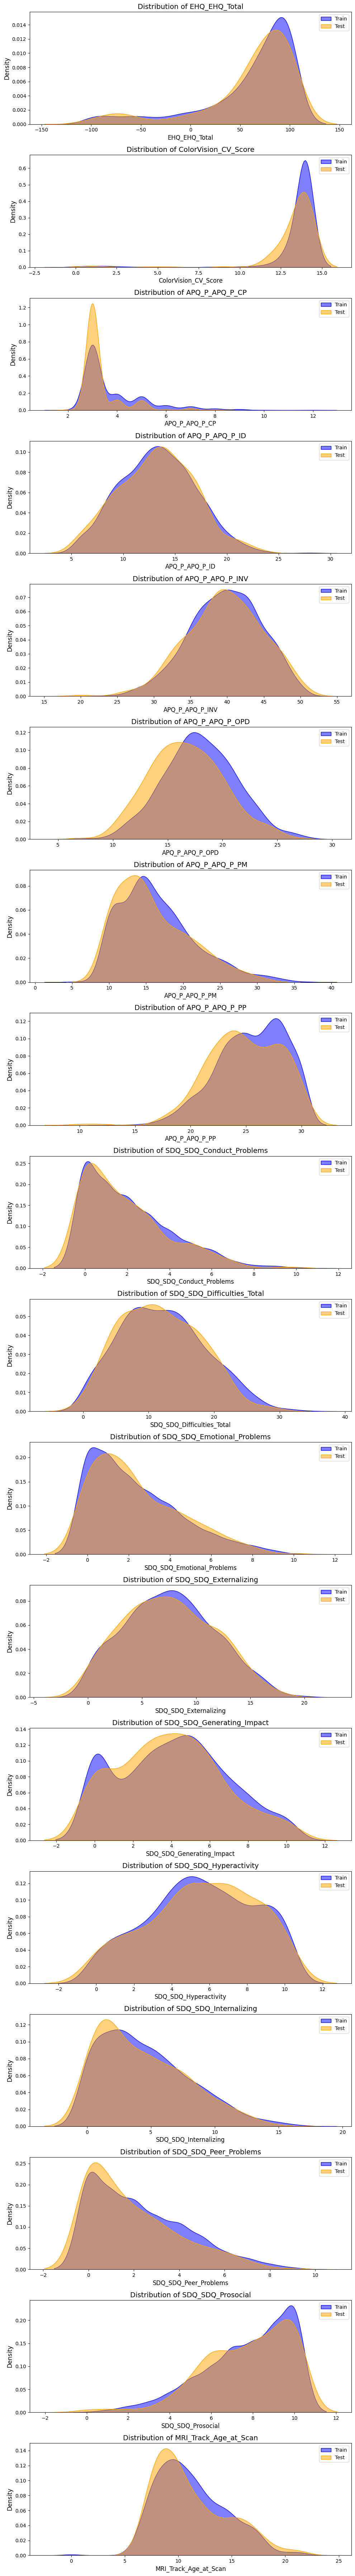

In [15]:
# Select numerical columns from train and test datasets
numerical_columns = ['EHQ_EHQ_Total', 'ColorVision_CV_Score', 'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 
                     'APQ_P_APQ_P_INV', 'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP', 
                     'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Difficulties_Total', 'SDQ_SDQ_Emotional_Problems', 
                     'SDQ_SDQ_Externalizing', 'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity', 
                     'SDQ_SDQ_Internalizing', 'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial', 'MRI_Track_Age_at_Scan']

# Create subplots for each numerical column
fig, axes = plt.subplots(len(numerical_columns), 1, figsize=(10, len(numerical_columns) * 4))

# Loop through each numerical column and plot its distribution for train and test datasets
for i, column in enumerate(numerical_columns):
    sns.kdeplot(train[column], label='Train', ax=axes[i], color='blue', fill=True, alpha=0.5)
    sns.kdeplot(test[column], label='Test', ax=axes[i], color='orange', fill=True, alpha=0.5)
    axes[i].set_title(f'Distribution of {column}', fontsize=14)
    axes[i].set_xlabel(column, fontsize=12)
    axes[i].set_ylabel('Density', fontsize=12)
    axes[i].legend()

# Adjust layout
plt.tight_layout()
plt.show()

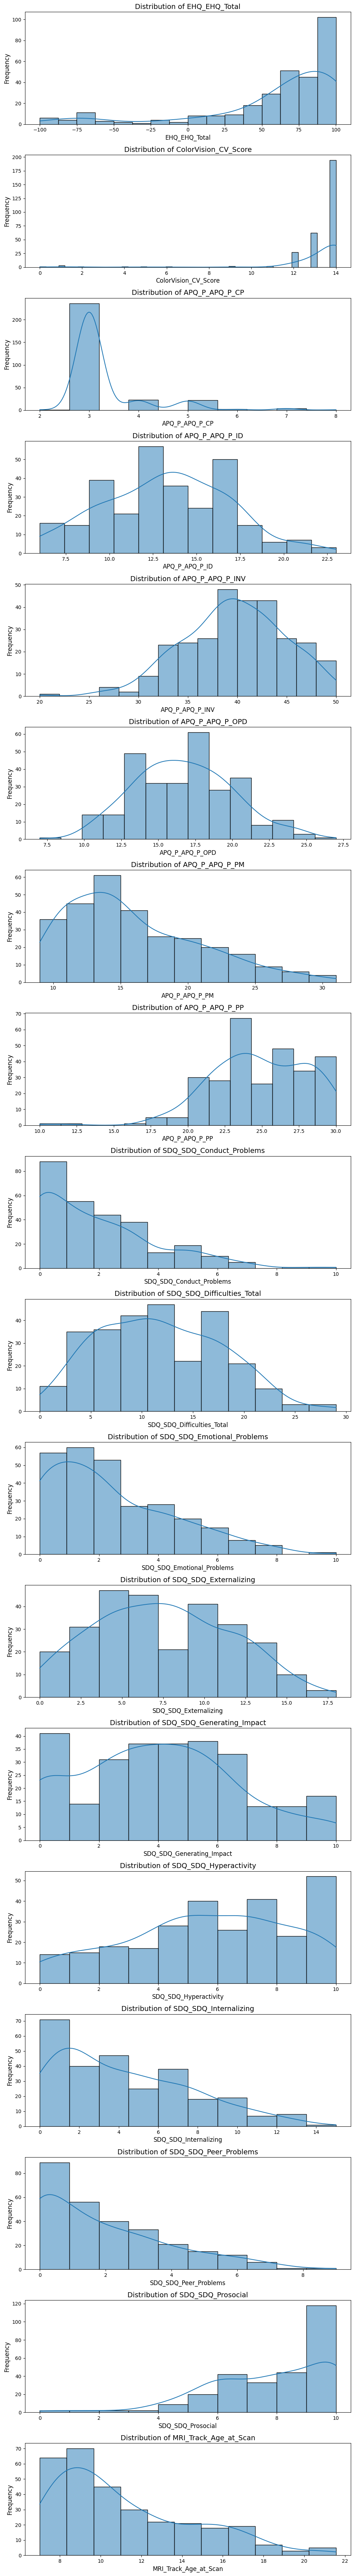

In [14]:
# Plot the distribution of numerical columns in the test dataset
test_numeric_columns = tsq.select_dtypes(include=['float64', 'int64']).columns

# Create a figure with subplots
fig, axes = plt.subplots(len(test_numeric_columns), 1, figsize=(10, len(test_numeric_columns) * 4))

# Loop through each numeric column and plot its distribution
for i, column in enumerate(test_numeric_columns):
    sns.histplot(tsq[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}', fontsize=14)
    axes[i].set_xlabel(column, fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# Filter the dataset for females
female_data = train[train['Sex_F'] == 1]

# Select the features to graph
features = ['EHQ_EHQ_Total', 'ColorVision_CV_Score', 'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 
            'APQ_P_APQ_P_INV', 'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP']

# Create subplots for each feature
fig, axes = plt.subplots(len(features), 1, figsize=(10, len(features) * 4))

# Loop through each feature and plot its distribution
for i, feature in enumerate(features):
    sns.kdeplot(female_data[feature], ax=axes[i], color='purple', fill=True, alpha=0.5)
    axes[i].set_title(f'Distribution of {feature} (Females)', fontsize=14)
    axes[i].set_xlabel(feature, fontsize=12)
    axes[i].set_ylabel('Density', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

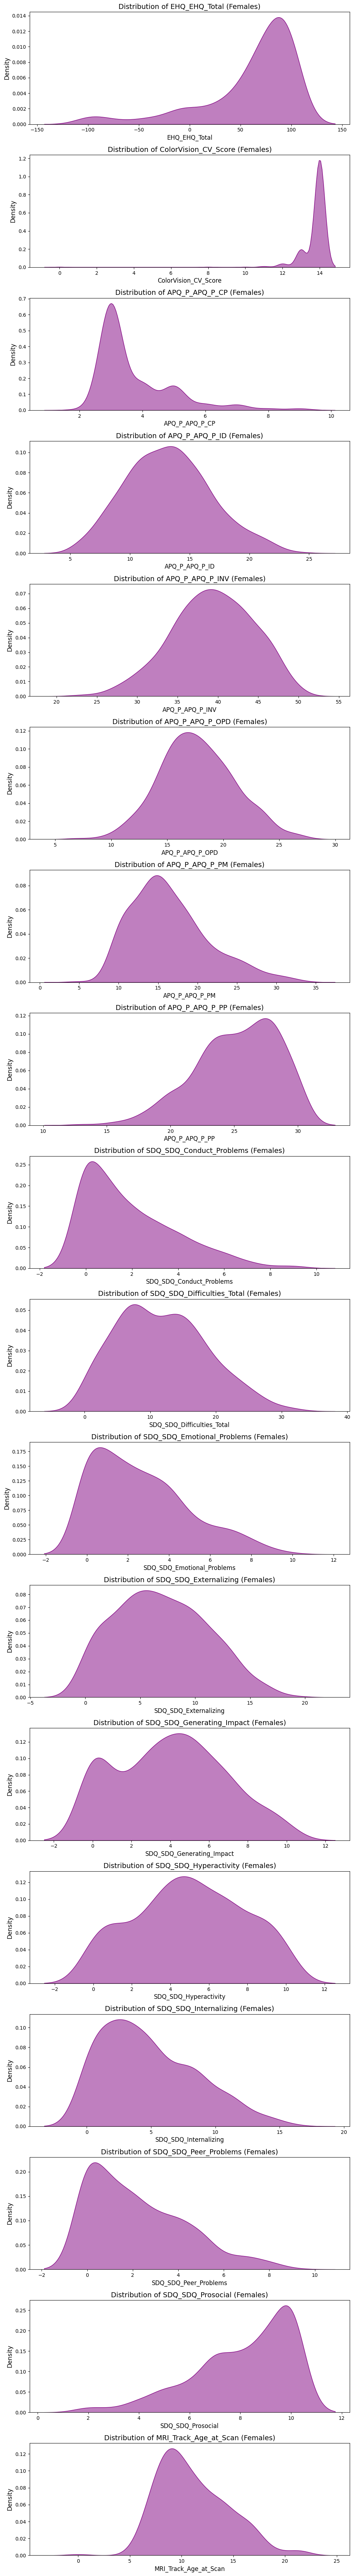

In [17]:
# Filter the dataset for females
female_data = train[train['Sex_F'] == 1]

# Select the features to graph
features =  ['EHQ_EHQ_Total', 'ColorVision_CV_Score', 'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 
                     'APQ_P_APQ_P_INV', 'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP', 
                     'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Difficulties_Total', 'SDQ_SDQ_Emotional_Problems', 
                     'SDQ_SDQ_Externalizing', 'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity', 
                     'SDQ_SDQ_Internalizing', 'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial', 'MRI_Track_Age_at_Scan']

# Create subplots for each feature
fig, axes = plt.subplots(len(features), 1, figsize=(10, len(features) * 4))

# Loop through each feature and plot its distribution
for i, feature in enumerate(features):
    sns.kdeplot(female_data[feature], ax=axes[i], color='purple', fill=True, alpha=0.5)
    axes[i].set_title(f'Distribution of {feature} (Females)', fontsize=14)
    axes[i].set_xlabel(feature, fontsize=12)
    axes[i].set_ylabel('Density', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Columns: 19930 entries, participant_id to Sex_F
dtypes: float64(19925), int64(4), object(1)
memory usage: 184.4+ MB


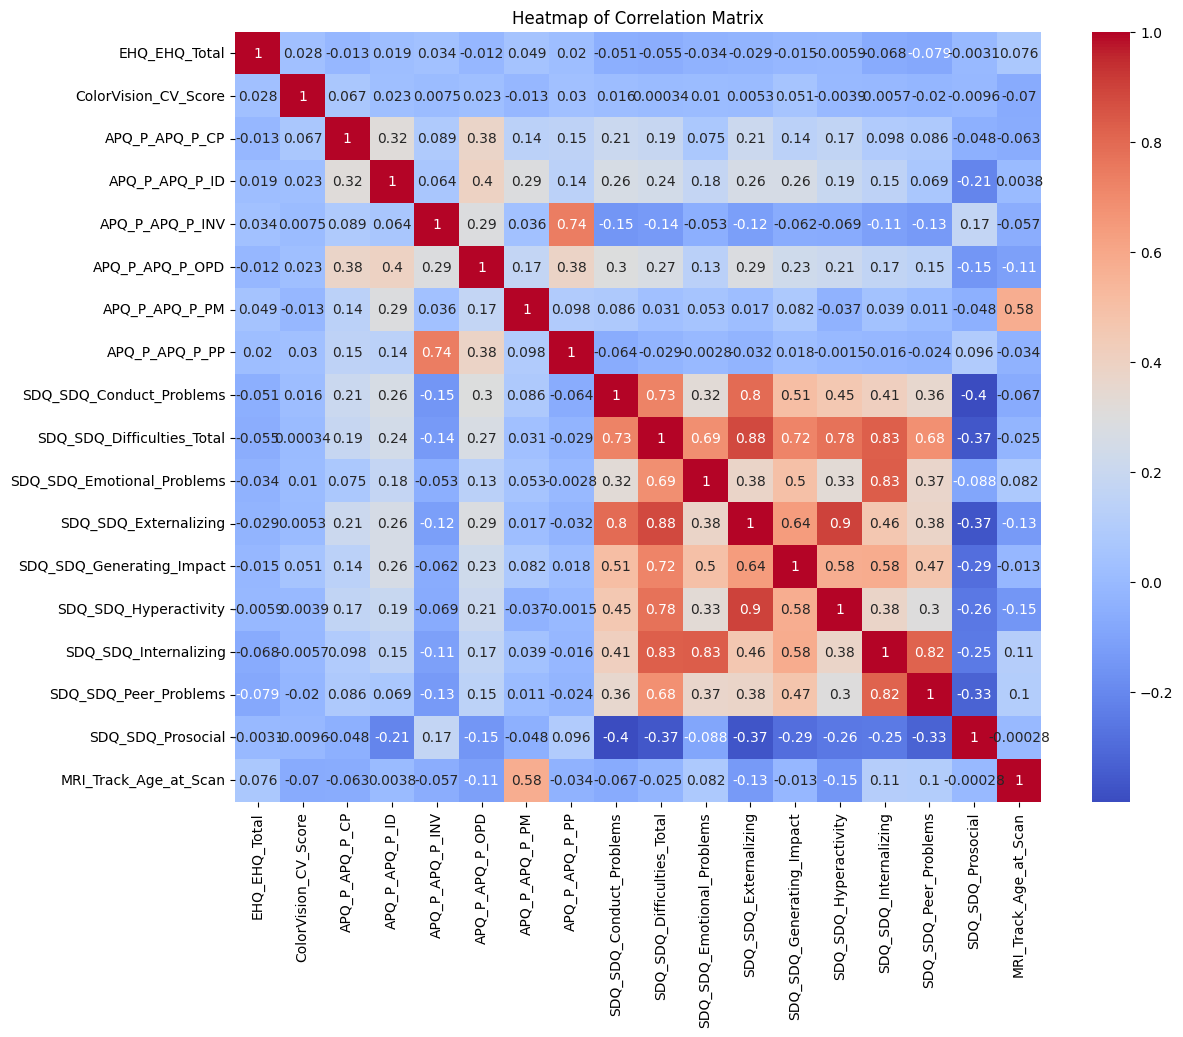

In [ ]:
plt.figure(figsize=(13, 10))
sns.heatmap(trq.drop(columns=['participant_id']).corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

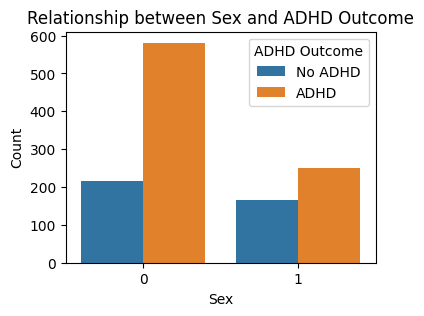

In [ ]:
plt.figure(figsize=(4, 3))
sns.countplot(x='Sex_F', hue='ADHD_Outcome', data=train)
plt.title('Relationship between Sex and ADHD Outcome')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='ADHD Outcome', loc='upper right', labels=['No ADHD', 'ADHD'])
plt.show()

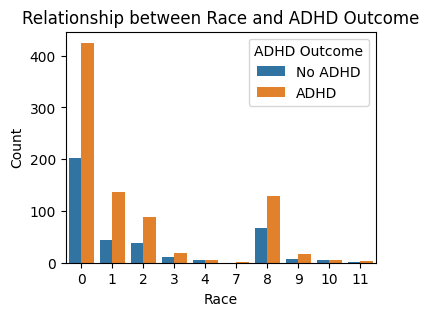

In [ ]:
plt.figure(figsize=(4, 3))
sns.countplot(x='PreInt_Demos_Fam_Child_Race', hue='ADHD_Outcome', data=train)
plt.title('Relationship between Race and ADHD Outcome')
plt.xlabel('Race')
plt.ylabel('Count')
plt.legend(title='ADHD Outcome', loc='upper right', labels=['No ADHD', 'ADHD'])
plt.show()

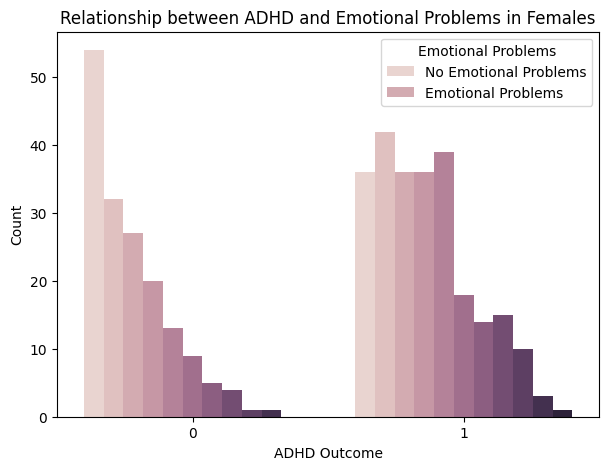

In [ ]:
df_female = train [train['Sex_F'] == 1]
plt.figure(figsize=(7, 5))
sns.countplot(x='ADHD_Outcome', hue='SDQ_SDQ_Emotional_Problems', data=df_female)
plt.title('Relationship between ADHD and Emotional Problems in Females')
plt.xlabel('ADHD Outcome')
plt.ylabel('Count')
plt.legend(title='Emotional Problems', loc='upper right', labels=['No Emotional Problems', 'Emotional Problems'])
plt.show()

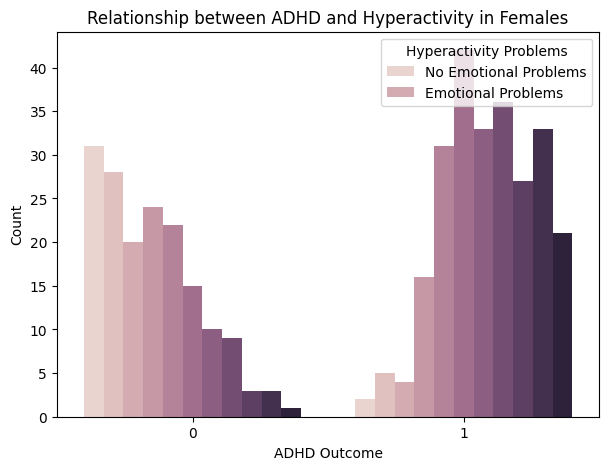

In [ ]:
df_female = train [train['Sex_F'] == 1]
plt.figure(figsize=(7, 5))
sns.countplot(x='ADHD_Outcome', hue='SDQ_SDQ_Hyperactivity', data=df_female)
plt.title('Relationship between ADHD and Hyperactivity in Females')
plt.xlabel('ADHD Outcome')
plt.ylabel('Count')
plt.legend(title='Hyperactivity Problems', loc='upper right', labels=['No Emotional Problems', 'Emotional Problems'])
plt.show()

In [ ]:
df_female = train [train['Sex_F'] == 1]
plt.figure(figsize=(7, 5))
sns.countplot(x='ADHD_Outcome', hue='SDQ_SDQ_Internalizing', data=df_female)
plt.title('Relationship between ADHD and SDQ_SDQ_Internalizing in females')
plt.xlabel('ADHD Outcome')
plt.ylabel('Count')
plt.legend(title='SDQ_SDQ_Internalizing', loc='upper left', labels=['No Internalizing', 'Internalizing'])
plt.show()

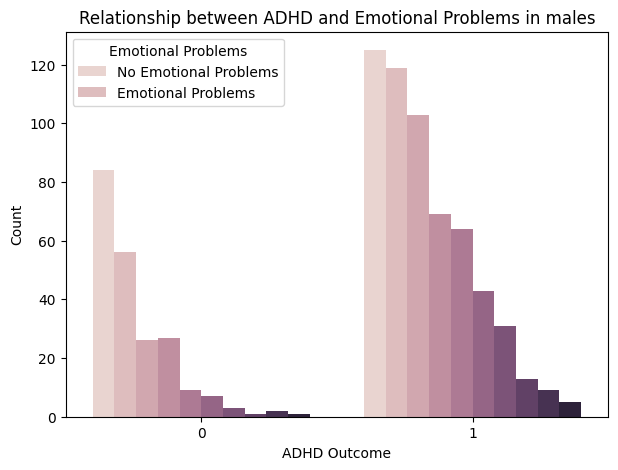

In [ ]:
df_male = train [train['Sex_F'] == 0]
plt.figure(figsize=(7, 5))
sns.countplot(x='ADHD_Outcome', hue='SDQ_SDQ_Emotional_Problems', data=df_male)
plt.title('Relationship between ADHD and Emotional Problems in males')
plt.xlabel('ADHD Outcome')
plt.ylabel('Count')
plt.legend(title='Emotional Problems', loc='upper left', labels=['No Emotional Problems', 'Emotional Problems'])
plt.show()

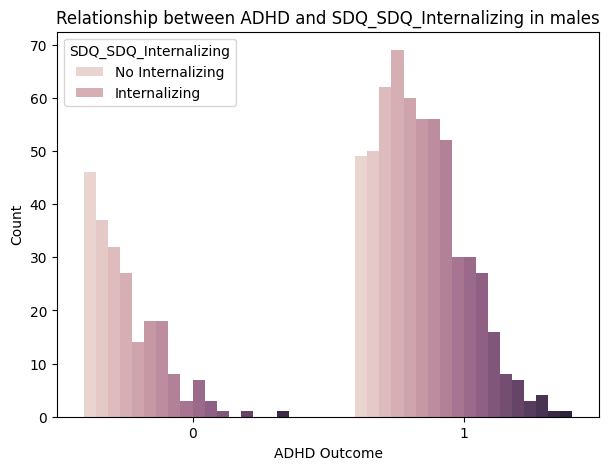

In [ ]:
df_male = train [train['Sex_F'] == 0]
plt.figure(figsize=(7, 5))
sns.countplot(x='ADHD_Outcome', hue='SDQ_SDQ_Internalizing', data=df_male)
plt.title('Relationship between ADHD and SDQ_SDQ_Internalizing in males')
plt.xlabel('ADHD Outcome')
plt.ylabel('Count')
plt.legend(title='SDQ_SDQ_Internalizing', loc='upper left', labels=['No Internalizing', 'Internalizing'])
plt.show()

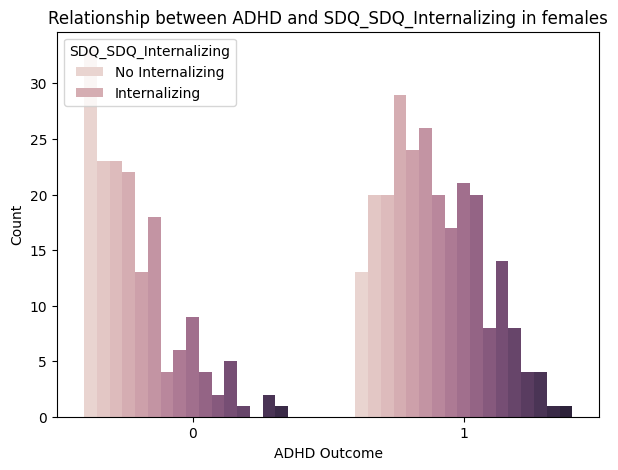

In [ ]:
df_female = train [train['Sex_F'] == 1]
plt.figure(figsize=(7, 5))
sns.countplot(x='ADHD_Outcome', hue='SDQ_SDQ_Internalizing', data=df_female)
plt.title('Relationship between ADHD and SDQ_SDQ_Internalizing in females')
plt.xlabel('ADHD Outcome')
plt.ylabel('Count')
plt.legend(title='SDQ_SDQ_Internalizing', loc='upper left', labels=['No Internalizing', 'Internalizing'])
plt.show()

In [ ]:
df_female = train [train['Sex_F'] == 1]
plt.figure(figsize=(7, 5))
sns.countplot(x='ADHD_Outcome', hue='SDQ_SDQ_Internalizing', data=df_female)
plt.title('Relationship between ADHD and SDQ_SDQ_Internalizing in females')
plt.xlabel('ADHD Outcome')
plt.ylabel('Count')
plt.legend(title='SDQ_SDQ_Internalizing', loc='upper left', labels=['No Internalizing', 'Internalizing'])
plt.show()

### Difference between Label Encoding and One-Hot Encoding

- **Label Encoding**: Assigns a unique integer to each category. Suitable for ordinal data where the order of categories is meaningful.
- **One-Hot Encoding**: Creates a binary column for each category. Suitable for nominal data where the order of categories is not meaningful.